In [1]:
import os
import pandas as pd#数据分析
import numpy as np#科学计算
path='F:/work/titanic/data'
data_train=pd.read_csv(os.path.join(path,'train.csv'))
data_train.info()
# 可以发现有一些列，比如说Cabin，有非常多的缺失值，还有Age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [2]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.describe()
# Survived的mean可以看出大概0.383838的人获救
# Pclass的mean可以看出2、3等舱的获救几率大
# 平均年龄29.7岁

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[10,6])
fig.set(alpha=0.2)#设定图标颜色参数

#直方图
plt.subplot2grid((2,3),(0,0)),data_train.Survived.value_counts().plot(kind='bar')
plt.title('Survived'),plt.ylabel('number'),plt.grid('on',axis='y')
plt.subplot2grid((2,3),(0,1)),data_train.Pclass.value_counts().plot(kind="bar")
plt.title('Passenger Class'),plt.ylabel('number')
#散点图
plt.subplot2grid((2,3),(0,2)),plt.scatter(data_train.Survived,data_train.Age,s=10)
plt.title('Age-Survived'),plt.ylabel('Age'),plt.grid(b=True,which='major',axis='y')
# 密度图
plt.subplot2grid((2,3),(1,0),colspan=2)
data_train.Age[data_train.Pclass==1].plot(kind='kde')
data_train.Age[data_train.Pclass==2].plot(kind='kde')
data_train.Age[data_train.Pclass==3].plot(kind='kde')
plt.title('Age distribution of passengers at all levels'),plt.xlabel('Age'),plt.ylabel('Density')
plt.legend(('1st class','2ed class','3rd class'),loc='best')

plt.subplot2grid((2,3),(1,2)),data_train.Embarked.value_counts().plot(kind='bar')
plt.title('The number of passengers at each boarding port.'),plt.ylabel('number')

fig.tight_layout(),plt.show()

(None, None)

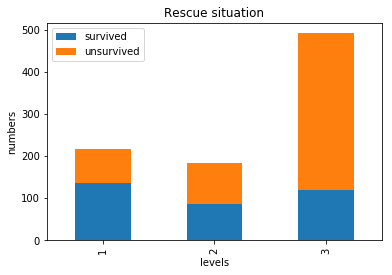

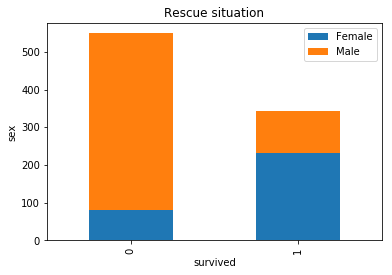

In [5]:
fig=plt.figure()
fig.set(alpha=0.2)

Survived_0=data_train.Pclass[data_train.Survived==0].value_counts()
Survived_1=data_train.Pclass[data_train.Survived==1].value_counts()
df=pd.DataFrame({'survived':Survived_1,'unsurvived':Survived_0})
df.plot(kind='bar',stacked=True),plt.title('Rescue situation'),plt.xlabel('levels'),plt.ylabel('numbers')
#等级高（1），舱位好，获救率相对高

Survived_m=data_train.Survived[data_train.Sex=='male'].value_counts()
Survived_f=data_train.Survived[data_train.Sex=='female'].value_counts()
df_sex=pd.DataFrame({'Male':Survived_m,'Female':Survived_f})
df_sex.plot(kind='bar',stacked=True),plt.title('Rescue situation'),plt.xlabel('survived'),plt.ylabel('sex')
# 女性获救比例高
plt.show()

- 如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了
- 如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中
- 如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中
- 有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。
本例中，后两种处理方式应该都是可行的，我们先试试拟合补全吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)

In [6]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):
#     把已有的数值特征提取出来丢进Random Forest Regressor中
    age_df=df[['Age','Fare','Parch','SibSp','Pclass']]
    known_age=age_df[age_df.Age.notnull()].as_matrix()
    unknown_age=age_df[age_df.Age.isnull()].as_matrix()
    y=known_age[:,0]
    x=known_age[:,1:]
    rfr=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(x,y)
    predictedAges=rfr.predict(unknown_age[:,1::])
    df.loc[(df.Age.isnull()),'Age']=predictedAges
    return df,rfr
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='Yes'
    df.loc[(df.Cabin.isnull()),'Cabin']='No'
    return df
data_train,rfr=set_missing_ages(data_train)
data_train=set_Cabin_type(data_train)

In [7]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


In [ ]:
dummies_Cabin=pd.get_dummies(data_train)